# <center> DENİZ BALCI SİMÜLASYON 4.ÖDEVİ</center>

# 1)  Paket Kurulumu ve Ön açıklama

Bütün hücreleri ayrı ayrı veya bütün halde çalıştırabilirsiniz.İlk olarak paketleri yükleyelim.

In [ ]:
!pip install scipy
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Soru1 


Box-müller yöntemi (dönüşümü =nedir  anlatınız.

Box müller methodu ,standart normal dağılımdan veri üretilmek için oluşturulan bir yöntemdir.
Kısacası yapılan işlem şu :değişken değiştirme yöntemi kullanılarak kartezyen koordinat sisteminden polar koordinat 
sistemine geçerek .Standart normal dağılım kullanılarak veri üretilir.


## ÇIKIŞ NOKTASI

$X \sim N(0,1), \quad U \sim Uniform(0,1)$ ,$E \sim üstel(1)$ dağılsın. $X_1,X_2$ normal dağılsın ve birbirinden bağımsız olsun.

Olasılık yoğunluk fonksiyonları aşağıdaki gibi olsun . 
\begin{equation}
f_{x1}=\frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-x^2}{2}} \quad  f_{x2}=\frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-x^2}{2}} 
\end{equation}
2 olasılık fonksiyonunun çarpımı aşağıdaki gibi olur.

\begin{equation}
f_{x1,x2}=\frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-(x1^2+x2^2)}{2}} 
\end{equation}

Dönüşümle birlikte  (Z1,Z2)$\sim cos(\theta).sin(\theta).R$

\begin{align*} det |J|= \left| \begin{array}{cc} \frac{\partial R cos (\theta)}{\partial \theta} & \frac{\partial Rsin(\theta)}{\partial \theta} \\ \frac{\partial R cos (\theta)}{\partial R} & \frac{\partial R sin(\theta)}{\partial R} \end{array} \right|  \end{align*}

\begin{align*}= \left( \begin{array}{cc} -Rsin(\theta) & Rcos(\theta) \\ cos(\theta) & sin(\theta) \end{array} \right) =>|-Rsin^2 (\theta)-Rcos^2(\theta)| =R(cos^2(\theta)+sin^2(\theta))=R \end{align*}

$x1->Rcos(\theta)  \quad x2->Rsin(\theta) $ olarak ele alalım.

Şimdi ise fx1,x2|J|  değişken değiştirme sonrasında aşağıdaki gibi sonuç elde edeceğiz.


\begin{equation}
f_{x1,x2}=\frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-(x1^2+x2^2)}{2}} .R=\frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-(R^2)}{2}} .R
\end{equation}

Ardından $E \sim üstel(1)$



$\frac{1}{\sqrt{2\pi \sigma^2}} \sim Uniform(0,2\pi)$ ve  $e^{\frac{-(R^2)}{2}} .R \sim \sqrt(2Ei) $ şeklinde dağılır.

$ (X_1,X_2) \sim cos(\theta),sin(\theta).R$  ve $\theta \sim uniform(0,2\pi)$  olduğundan $X=cos(\theta)\sqrt(2Ei)$  şeklinde veri üreterek normal dağılımı simüle edebiliriz. 

# Soru 2
a) $X \sim N(\mu,\sigma^2)$ Normal dağılımına sahip olsun.Box müller yöntemi ile X rassal değişkeninden 100 birim veri üretiniz

b) Kabul red yönteminde  $v=g(v) \sim cauchy $ olacak şekilde X rassal değişkeninden veri üretiniz

c) K-R  yönteminde  $g(v)$ 'yi siz belirleyiniz.

### A şıkkı 1.YOL

/tmp/ipykernel_53069/1557331182.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[i] = mu + X * sigma


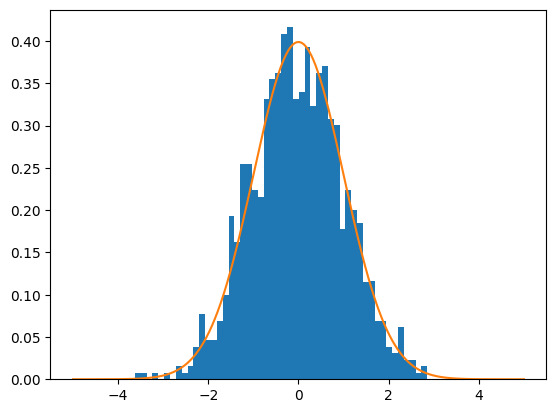

In [16]:
import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def f(theta, E):
    return np.cos(theta)* np.sqrt(2 * E)

def BoxMuller(N, mu=0, sigma=1):
    out = np.zeros(N)
    for i in range(N):
        theta = rd.uniform(low=0, high=2 * np.pi, size=1)
        E = rd.exponential(scale=1 / 1, size=1)
        X = f(theta, E)
        out[i] = mu + X * sigma
    return out

def normaldist(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

plt.figure()
X = BoxMuller(1000, mu=0, sigma=1)
plt.hist(X, bins=50, density=True)
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, normaldist(xx, 0, 1))
plt.show()


### A şıkkı 2.yol

In [20]:
U1= rd.uniform(low=0, high=1 , size=500)
U2= rd.uniform(low=0, high=1 , size=500)
X1=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
X2=np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
X=np.concatenate((X1,X2),axis=0)


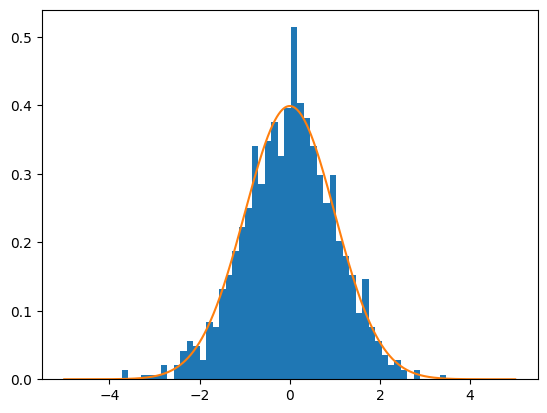

In [21]:
plt.figure()
plt.hist(X, bins=50, density=True)
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, normaldist(xx, 0, 1))
plt.show()


### kaynakça

https://www.youtube.com/watch?v=SvneCLZ3dLk  a şıkkı 1.yol

https://www.youtube.com/watch?v=4fVQrH65aWU  a şıkkı 2.yol

https://www.colorado.edu/amath/sites/default/files/attached-files/stochastic_simulation6.pdf

https://rh8liuqy.github.io/Box_Muller_Algorithm.html

### B ŞIKKI  

Kabul red yönteminde  $v=g(v) \sim cauchy $ olacak şekilde X rassal değişkeninden veri üretiniz

In [10]:
import numpy as np
import math

def cauchy_fx(x, theta):
    return (1/np.pi)*(1/(1-(x-theta)**2))

def cauchy_Fx(x, theta):
    return (1/np.pi)*np.arctan(x-theta)+1/2

def inverse_cauchyFx(x, theta):
    return np.tan(np.pi*(x-0.5))+theta

def generate_cauchy(n, theta):
    dataset = np.random.uniform(0, 1, n)
    generated_values = []
    for i in dataset:
        pvalue = inverse_cauchyFx(i, theta)
        generated_values.append(pvalue)
    return generated_values

def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def find_c(N, mu, sigma, theta):
    dataset = np.random.uniform(0, 1, N)
    generated_values = []
    for i in dataset:
        value = normal_pdf(i, mu, sigma) / cauchy_fx(i, theta) 
        generated_values.append(value)
    return np.max(generated_values)


kabul_dataset = []
n = 100
theta = 1
mu = 0
sigma = 1
for i in range(0, n):
    v = generate_cauchy(1, theta)[0]  
    u = np.random.uniform(-5, 5, 1)
    gv = cauchy_fx(v, theta)
    fv = normal_pdf(v, mu, sigma)
    c = find_c(n, mu, sigma, theta)  
    value = fv / (c * gv)
    if u < value:
        kabul_dataset.append(value)
        

print(len(kabul_dataset) / n)


print("cauchy dağılımının beklenen değer ve varyansı tanımlı değildir.")


0.47
cauchy dağılımının beklenen değer ve varyansı tanımlı değildir.


In [46]:
import numpy as np
import math

def gumbel_fx(x, mu, beta):
    return (1/beta) * np.exp(-(x - mu) / beta) * np.exp(-np.exp(-(x - mu) / beta))

def gumbel_Fx(x, mu, beta):
    return np.exp(-np.exp(-(x - mu) / beta))

def inverse_gumbelFx(x, mu, beta):
    return mu - beta * np.log(-np.log(x))

def generate_gumbel(n, mu, beta):
    dataset = np.random.uniform(0, 1, n)
    generated_values = []
    for i in dataset:
        pvalue = inverse_gumbelFx(i, mu, beta)
        generated_values.append(pvalue)
    return generated_values

def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def find_c(N, mu, sigma, theta):
    dataset = np.random.uniform(0, 1, N)
    generated_values = []
    for i in dataset:
        value = normal_pdf(i, mu, sigma) / gumbel_fx(i, mu, beta) 
        generated_values.append(value)
    return np.max(generated_values)




def AR(n, mu, beta, sigma):
    kabul_dataset = []
    
    # Assuming generate_gumbel, gumbel_fx, normal_pdf, and find_c are defined elsewhere
    c = find_c(n, mu, sigma, beta)  # Call find_c outside the loop
    
    for i in range(n):
        v = generate_gumbel(1, mu, beta)[0]  # Access the first element of the generated list
        u = np.random.uniform(-5, 5)  # Generate a single uniform random variable
        gv = gumbel_fx(v, mu, beta)
        fv = normal_pdf(v, mu, sigma)
        value = fv / (c * gv)
        
        if u < value:
            kabul_dataset.append(value)
    
    print(len(kabul_dataset) / n)
    return kabul_dataset

    
    
    
n = 650
mu = 0
beta = 1
sigma = 1
sonveriseti=[]
for i in range(0,100):
   dataset=AR(n,mu,beta,sigma)
   sonveriseti.extend(dataset)

len(sonveriseti)


0.5907692307692308
0.5861538461538461
0.5707692307692308
0.6046153846153847
0.5876923076923077
0.6030769230769231
0.6015384615384616
0.5784615384615385
0.6030769230769231
0.5876923076923077
0.5938461538461538
0.5815384615384616
0.6046153846153847
0.5815384615384616
0.5846153846153846
0.5984615384615385
0.5923076923076923
0.5923076923076923
0.5723076923076923
0.5753846153846154
0.5923076923076923
0.5938461538461538
0.583076923076923
0.6107692307692307
0.5476923076923077
0.6092307692307692
0.5846153846153846
0.5676923076923077
0.5846153846153846
0.583076923076923
0.5769230769230769
0.5923076923076923
0.5723076923076923
0.5876923076923077
0.6061538461538462
0.5923076923076923
0.5784615384615385
0.6092307692307692
0.6276923076923077
0.5615384615384615
0.6046153846153847
0.5861538461538461
0.5676923076923077
0.6030769230769231
0.5738461538461539
0.5723076923076923
0.5692307692307692
0.5953846153846154
0.6030769230769231
0.5815384615384616
0.6123076923076923
0.5492307692307692
0.598461538461

38327

https://en.wikipedia.org/wiki/Gumbel_distribution

	
$E(x)= \mu +\beta \gamma$
$\gamma$ is the Euler–Mascheroni sabitidir.


$Var(x)=\pi^2/6 * \beta^2$

skewness $ \approx 1.14$

Excess kurtosis $=12/5 $


In [47]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [50]:
import sympy
import math
from scipy.stats import norm, kurtosis,skew
def expected_value(mu, beta):
    gamma = sympy.EulerGamma.evalf() # Euler-Mascheroni constant
    return mu + beta * gamma

def variance(beta):
    pi_squared_over_6 = (math.pi ** 2) / 6
    return pi_squared_over_6 * (beta ** 2)

skewness=1.14
exceed_kurtosis=12/5
print("örneklem değerleri \n ----------")
print(f"ortalama:{np.mean(sonveriseti)}")
print(f"varyans :{np.var(sonveriseti)}")
print(f"skewness :{skew(sonveriseti)}")
print(f"exceed_kurtosis :{kurtosis(sonveriseti)}")

print("--------- \n anakütle \n ----------")
print(f"ortalama  {expected_value(mu, beta) } ")  
print(f"varyans  {variance(beta)} ")  
print(f" skewness {skewness}" )
print(f" exceed_kurtosis {exceed_kurtosis}" )

örneklem değerleri 
 ----------
ortalama:0.9677880673882925
varyans :2.364522954058004
skewness :0.1487528085435489
exceed_kurtosis :21.443409250361867
---------- 
 anakütle 
 ----------
ortalama  0.577215664901533 
varyans  1.6449340668482264 
 skewness 1.14
 exceed_kurtosis 2.4
